In [49]:
# import necessary libraries
import pandas as pd
import numpy as np


 **1-Loading the data**

In [50]:
#pd.read_csv-->a function provided by pandas library to load and read a CSV file into a pandas DataFrame.
df=pd.read_csv('/content/Complaints.csv', encoding='ISO-8859-1')

# df.head()-->a method to return the first n rows of a DataFrame object.
df.head(5)

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint


**2-Exploring the Data**

In [51]:
df.info() # a method used to get a quick and concise summary of a DataFrame object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

In [52]:
df.isnull().sum() #used to count the number of missing or null values in each column of a DataFrame

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

In [53]:
df.duplicated().sum() # a method used to count the number of duplicate rows in a DataFrame.

0

**3-Preparing the Data**

In [54]:
#Dropping the columns that has a lot of missing values in it
df.drop('RESOLUTION', axis=1, inplace=True)
df.drop('RESOLUTION_DESCRIPTION', axis=1, inplace=True)
df.drop('CASE_DESC', axis=1, inplace=True)
df.drop('CALLBACK_MECHANISM', axis=1, inplace=True)
df.drop('CASE_ID', axis=1, inplace=True)

# dropping un-important features
df.drop('OPEN_USER', axis=1, inplace=True)
df.drop('CLOSE_USER', axis=1, inplace=True)


#fillna() a method used to replace missing or null values (NaN) in a DataFrame.
df['OFFER_NAME'].fillna("unknown", inplace= True)
df['CUSTOMER_GROUP'].fillna("unknown", inplace= True)
df['CLOSE_GROUP'].fillna("unknown", inplace= True)
df['OPEN_GR'].fillna("unknown", inplace= True)
#the columns CLOSE_DATE and AGE_BRACKET are empty because the complaint is still
#active and they are both 119 null values. I will fill CLOSE_DATE with 'Still in progress'
#but I will fill AGE_BRACKET with the mean to have better result than fill it with 'Still in progress'
df['CLOSE_DATE'].fillna("Still in progress", inplace= True)
df['AGE_BRACKET'].fillna(df['AGE_BRACKET'].mean(), inplace = True)

# (ESCALATED_GROUP = CLOSE_GROUP) in most of the columns.
df['ESCALATED_GROUP'].fillna("unknown", inplace = True)

df.isnull().sum()



OFFER_NAME          0
CUSTOMER_TYPE       0
CUSTOMER_GROUP      0
CURRENT_STATUS      0
ESCALATION_FLAG     0
ESCALATED_GROUP     0
OPEN_DATE           0
CLOSE_DATE          0
CLOSE_GROUP         0
AGE_BRACKET         0
ACTUAL_COMPLAINT    0
OPEN_GR             0
COMPLAINT_TYPE      0
PRODUCT             0
CASE                0
dtype: int64

In [55]:
df

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,CLOSE_DATE,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,21.06.2022 13:41,F&I_BO,2.0,Actual Complaint,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,unknown,CBU,unknown,Resolved,Yes,Mobile_BO,04.04.2022 14:11,05.04.2022 12:13,Mobile_BO,1.0,Not Actual Complaint,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,unknown,03.08.2022 03:20,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,18.06.2022 20:38,18.06.2022 20:38,unknown,1.0,User Not Filled,unknown,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,06.07.2022 01:22,06.07.2022 01:22,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,OnLine Prepaid,CBU,Prepaid,Resolved,No,unknown,23.04.2022 09:31,23.04.2022 09:31,unknown,1.0,User Not Filled,unknown,Commercial,Mobile,Commercial claim
10411,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,21.06.2022 19:40,21.06.2022 19:40,unknown,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
10412,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,unknown,14.04.2022 14:36,14.04.2022 14:36,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
10413,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,unknown,07.07.2022 05:54,07.07.2022 05:54,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint


In [56]:
#df.to_csv(r'Complaints_After.csv',index=True)

In [57]:
#df = df.drop(['ESCALATED_GROUP','CASE_ID', 'OPEN_DATE','CUSTOMER_GROUP', 'OPEN_USER','CLOSE_DATE','CLOSE_GROUP','CLOSE_USER','ACTUAL_COMPLAINT','OPEN_GR'], axis = 1)

In [58]:
df

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,CLOSE_DATE,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,21.06.2022 13:41,F&I_BO,2.0,Actual Complaint,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,unknown,CBU,unknown,Resolved,Yes,Mobile_BO,04.04.2022 14:11,05.04.2022 12:13,Mobile_BO,1.0,Not Actual Complaint,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,unknown,03.08.2022 03:20,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,18.06.2022 20:38,18.06.2022 20:38,unknown,1.0,User Not Filled,unknown,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,06.07.2022 01:22,06.07.2022 01:22,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,OnLine Prepaid,CBU,Prepaid,Resolved,No,unknown,23.04.2022 09:31,23.04.2022 09:31,unknown,1.0,User Not Filled,unknown,Commercial,Mobile,Commercial claim
10411,FTTH Home,CBU,FTTH Home,Resolved,No,unknown,21.06.2022 19:40,21.06.2022 19:40,unknown,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
10412,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,unknown,14.04.2022 14:36,14.04.2022 14:36,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint
10413,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,unknown,07.07.2022 05:54,07.07.2022 05:54,CYC_COMMERCAIL_TEAM,1.0,User Not Filled,CBU - CC 1st Layer AÂ,Technical,Internet,Technical complaint


In [59]:
#convert the values in the 'AGE_BRACKET' column of the DataFrame df into numerical values.
df['AGE_BRACKET'] = pd.factorize(df['AGE_BRACKET'])[0]

In [60]:
#select only the columns of a dataset that have the data type 'object' and converting them to numbers
data_CatToVal = df.select_dtypes(['object']).columns

from sklearn.preprocessing import LabelEncoder
#a class provided by the scikit-learn library to convert categorical variables into numerical values which modifies the original DataFrame.
label_encoder = LabelEncoder()
df[data_CatToVal] = df[data_CatToVal].apply(LabelEncoder().fit_transform)



df.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,CLOSE_DATE,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,1,1,11,5650,6285,19,0,0,10,1,0,4
1,140,0,73,1,1,17,965,1314,28,1,1,17,0,1,0
2,9,0,70,1,0,24,867,852,10,1,2,2,1,0,4
3,24,0,16,1,0,24,5364,5392,46,1,2,18,1,0,4
4,24,0,16,1,0,24,1660,1756,10,1,2,2,1,0,4


In [61]:
#seperate the dependent variable from the independent variable.
dependent = 'PRODUCT'
y = df[[dependent]]
y=np.ravel(y)            #I used ravel() to avoid the error in the loop

In [62]:
independent = list(df.columns)
independent.remove('PRODUCT')
X = df[independent]
X

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,CLOSE_DATE,CLOSE_GROUP,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,CASE
0,24,0,16,1,1,11,5650,6285,19,0,0,10,1,4
1,140,0,73,1,1,17,965,1314,28,1,1,17,0,0
2,9,0,70,1,0,24,867,852,10,1,2,2,1,4
3,24,0,16,1,0,24,5364,5392,46,1,2,18,1,4
4,24,0,16,1,0,24,1660,1756,10,1,2,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,60,0,54,1,0,24,6729,6738,46,1,2,18,0,0
10411,24,0,16,1,0,24,6279,6314,46,1,2,2,1,4
10412,22,1,14,1,0,24,3886,3931,10,1,2,2,1,4
10413,9,0,70,1,0,24,1937,2032,10,1,2,2,1,4


In [63]:
Final = pd.DataFrame(index=["accuracy_score","recall_score","precision_score","f1_score"],columns=["KNN","DT","NB","Log"])

Final

,KNN,DT,NB,Log
accuracy_score,NaN,NaN,NaN,NaN
recall_score,NaN,NaN,NaN,NaN
precision_score,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN


In [64]:
#Importing all necessary libraries 

# train_test_split function is a  function used to split a dataset into two subsets: a training set and a test set.
from sklearn.model_selection import train_test_split
#DecisionTreeClassifier is a class that implements the decision tree algorithm for classification problems. '
#it can handle both numerical and categorical data and it doesn't require data normalization.
from sklearn.tree import DecisionTreeClassifier
#KNeighborsClassifier used to create a k-Nearest Neighbors (k-NN) classifier model.
from sklearn.neighbors import KNeighborsClassifier
#GaussianNB used to create a Gaussian Naive Bayes (NB) classifier model.
from sklearn.naive_bayes import GaussianNB
#used to evaluate the performance of a classification model.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.preprocessing import MinMaxScaler

**Applying KNN learning algorithm  on the data set**

In [65]:
# set 3 nearest neighbors for predictions
KNN = KNeighborsClassifier(n_neighbors=3)

In [66]:
sum_acc1 = 0
sum_pre1 = 0
sum_rec1 = 0
sum_f1_1 = 0
KNN_Accuracy=[]
KNN_Recall=[]
KNN_Precision=[]
KNN_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  KNN.fit(X_train, y_train) 
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = KNN.predict(X_test)
  #evaluating the performance of a classification model
  acc = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc1 = sum_acc1 + acc
  rec = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec1 = sum_rec1 + rec
  pre =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre1 = sum_pre1 + pre
  f1 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_1 = sum_f1_1 + f1
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  KNN_Accuracy.append(acc)
  KNN_Recall.append(rec)
  KNN_Precision.append(pre)
  KNN_F1.append(f1) 
print('=========================================================')
print('Average Accuracy:', sum_acc1/10)
print('Average Recall:', sum_rec1/10)
print('Average Precision:', sum_pre1/10)
print('Average F1-Score:', sum_f1_1/10)

Final['KNN'] = [sum_acc1/10, sum_rec1/10, sum_pre1/10, sum_f1_1/10]

Average Accuracy: 0.8930240000000002
Average Recall: 0.770416457383756
Average Precision: 0.8553811728050025
Average F1-Score: 0.8105400358474946


In [67]:
KNN2 = KNeighborsClassifier(n_neighbors=15)

In [68]:
sum_acc11 = 0
sum_pre11 = 0
sum_rec11 = 0
sum_f1_11 = 0
KNN2_Accuracy=[]
KNN2_Recall=[]
KNN2_Precision=[]
KNN2_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  KNN2.fit(X_train, y_train) 
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = KNN2.predict(X_test)
  #evaluating the performance of a classification model
  acc1 = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc11 = sum_acc11 + acc1
  rec1 = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec11 = sum_rec11 + rec1
  pre1 =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre11 = sum_pre11 + pre1
  f11 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_11 = sum_f1_11 + f11
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  KNN2_Accuracy.append(acc1)
  KNN2_Recall.append(rec1)
  KNN2_Precision.append(pre1)
  KNN2_F1.append(f11) 
print('=========================================================')
print('Average Accuracy:', sum_acc11/10)
print('Average Recall:', sum_rec11/10)
print('Average Precision:', sum_pre11/10)
print('Average F1-Score:', sum_f1_11/10)

Average Accuracy: 0.816704
Average Recall: 0.558772909873112
Average Precision: 0.7704127840241276
Average F1-Score: 0.647394366103604


In [69]:
KNN_Accuracy


[0.88544,
 0.88864,
 0.88768,
 0.89056,
 0.88672,
 0.89376,
 0.9056,
 0.89504,
 0.90464,
 0.89216]

**Applying Decision Tree learning algorithm**

In [70]:
#creating a decision tree classifier model.
clf = DecisionTreeClassifier( random_state = 100)

In [71]:
sum_acc2 = 0
sum_pre2 = 0
sum_rec2 = 0
sum_f1_2 = 0
DT_Accuracy=[]
DT_Recall=[]
DT_Precision=[]
DT_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  clf.fit(X_train, y_train) 
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = clf.predict(X_test)
  #evaluating the performance of a classification model
  acc = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc2 = sum_acc2 + acc
  rec = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec2 = sum_rec2 + rec
  pre =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre2 = sum_pre2 + pre
  f1 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_2 = sum_f1_2 + f1
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  DT_Accuracy.append(acc)
  DT_Recall.append(rec)
  DT_Precision.append(pre)
  DT_F1.append(f1)

print('=========================================================')
print('Average Accuracy:', sum_acc2/10)
print('Average Recall:', sum_rec2/10)
print('Average Precision:', sum_pre2/10)
print('Average F1-Score:', sum_f1_2/10)
Final['DT'] = [sum_acc2/10, sum_rec2/10, sum_pre2/10, sum_f1_2/10]

Average Accuracy: 0.9903040000000001
Average Recall: 0.9828947524819786
Average Precision: 0.9846606281428574
Average F1-Score: 0.9837654199151477


**Applying Naive Bayes training model classification:**

In [72]:
# Creating a Gaussian Naive Bayes classifier model
GNB = GaussianNB()

In [73]:
sum_acc3 = 0
sum_pre3 = 0
sum_rec3 = 0
sum_f1_3 = 0
NB_Accuracy=[]
NB_Recall=[]
NB_Precision=[]
NB_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  GNB.fit(X_train, y_train) 
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = GNB.predict(X_test)
  #evaluating the performance of a classification model
  acc = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc3 = sum_acc3 + acc
  rec = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec3 = sum_rec3 + rec
  pre =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre3 = sum_pre3 + pre
  f1 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_3 = sum_f1_3 + f1
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  NB_Accuracy.append(acc)
  NB_Recall.append(rec)
  NB_Precision.append(pre)
  NB_F1.append(f1)

print('=========================================================')
print('Average Accuracy:', sum_acc3/10)
print('Average Recall:', sum_rec3/10)
print('Average Precision:', sum_pre3/10)
print('Average F1-Score:', sum_f1_3/10)
Final['NB'] = [sum_acc3/10, sum_rec3/10, sum_pre3/10, sum_f1_3/10]

Average Accuracy: 0.8441599999999999
Average Recall: 0.828358293277571
Average Precision: 0.7017296035591307
Average F1-Score: 0.7596375175288774


In [74]:
Final

,KNN,DT,NB,Log
accuracy_score,0.893024,0.990304,0.844160,NaN
recall_score,0.770416,0.982895,0.828358,NaN
precision_score,0.855381,0.984661,0.701730,NaN
f1_score,0.810540,0.983765,0.759638,NaN


**Logistic Regression**

In [75]:
# importing important libraries
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() 

In [76]:
sum_acc4 = 0
sum_pre4 = 0
sum_rec4 = 0
sum_f1_4 = 0

log_Accuracy=[]
log_Recall=[]
log_Precision=[]
log_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  log.fit(X_train, y_train) 
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = log.predict(X_test)
  #evaluating the performance of a classification model
  acc = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc4 = sum_acc4 + acc
  rec = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec4 = sum_rec4 + rec
  pre =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre4 = sum_pre4 + pre
  f1 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_4 = sum_f1_4 + f1
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  log_Accuracy.append(acc)
  log_Recall.append(rec)
  log_Precision.append(pre)
  log_F1.append(f1)

print('=========================================================')
print('Average Accuracy:', sum_acc4/10)
print('Average Recall:', sum_rec4/10)
print('Average Precision:', sum_pre4/10)
print('Average F1-Score:', sum_f1_4/10)
Final['LogR'] = [sum_acc4, sum_rec4, sum_pre4, sum_f1_4]



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Average Accuracy: 0.824128
Average Recall: 0.6166646030926122
Average Precision: 0.7488895582492148
Average F1-Score: 0.6761406341364193


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

**Barchart for accuracy,Recall,Precision, F1 of the KNN, DT, and NB**

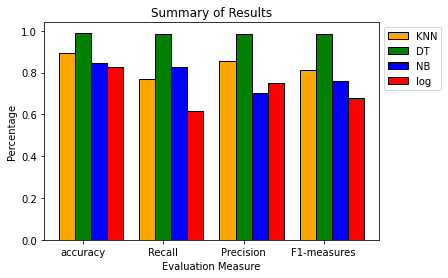

In [77]:
import matplotlib.pyplot as plt

machine_learning_measure = ['accuracy','Recall','Precision', 'F1-measures']
machine_learning_model_KNN = [sum_acc1/10, sum_rec1/10, sum_pre1/10, sum_f1_1/10]
machine_learning_model_DT = [sum_acc2/10, sum_rec2/10, sum_pre2/10, sum_f1_2/10]
machine_learning_model_NB = [sum_acc3/10, sum_rec3/10, sum_pre3/10, sum_f1_3/10]
machine_learning_model_log = [sum_acc4/10, sum_rec4/10, sum_pre4/10, sum_f1_4/10]
X_axis = np.arange(len(machine_learning_measure ))
  

# creating the bar plot
plt.bar(X_axis+0.1, machine_learning_model_KNN, color ='orange',width = 0.2,edgecolor = 'black',label = 'KNN')
plt.bar(X_axis + 0.3, machine_learning_model_DT, color ='green',width = 0.2,edgecolor = 'black',label = 'DT')
plt.bar(X_axis + 0.5, machine_learning_model_NB, color ='blue',width = 0.2,edgecolor = 'black',label = 'NB')
plt.bar(X_axis + 0.7, machine_learning_model_log, color ='red',width = 0.2,edgecolor = 'black',label = 'log')

plt.xticks(X_axis+0.3, machine_learning_measure )
plt.legend(bbox_to_anchor=(1, 1))


plt.xlabel("Evaluation Measure")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()


In [78]:
print(KNN_Accuracy)
print(DT_Accuracy)
print(NB_Accuracy)

[0.88544, 0.88864, 0.88768, 0.89056, 0.88672, 0.89376, 0.9056, 0.89504, 0.90464, 0.89216]
[0.98976, 0.99136, 0.98976, 0.99168, 0.98912, 0.99296, 0.9872, 0.99232, 0.9904, 0.98848]
[0.84576, 0.83744, 0.8416, 0.85408, 0.84416, 0.84384, 0.84192, 0.84032, 0.85376, 0.83872]


**Boxblot for accuracy of KNN, DT, and NB**

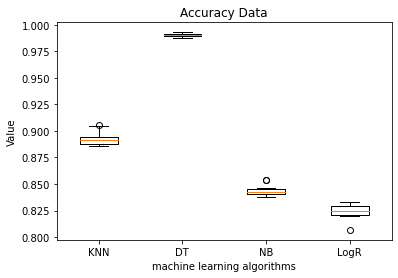

In [79]:
data = [KNN_Accuracy, DT_Accuracy, NB_Accuracy,log_Accuracy]

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a boxplot
ax.boxplot(data, labels=["KNN", "DT", "NB",'LogR'])

# Adding a title and labels for the x and y axis
ax.set_title("Accuracy Data")
ax.set_xlabel("machine learning algorithms")
ax.set_ylabel("Value")

# Show the plot
plt.show()

**Boxblot for Precision of KNN, DT, and NB**



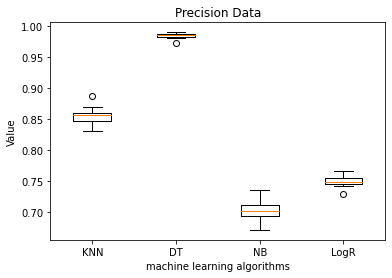

In [80]:
data = [KNN_Precision, DT_Precision, NB_Precision, log_Precision]

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a boxplot
ax.boxplot(data, labels=["KNN", "DT", "NB",'LogR'])

# Adding a title and labels for the x and y axis
ax.set_title("Precision Data")
ax.set_xlabel("machine learning algorithms")
ax.set_ylabel("Value")

# Show the plot
plt.show()

**Boxplot for Recall of KNN, DT, and NB**

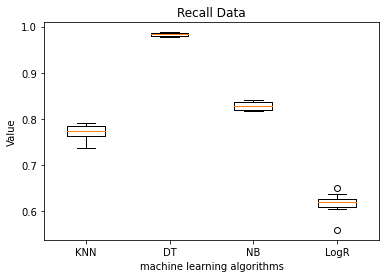

In [81]:
data = [KNN_Recall, DT_Recall, NB_Recall,log_Recall]

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a boxplot
ax.boxplot(data, labels=["KNN", "DT", "NB",'LogR'])

# Adding a title and labels for the x and y axis
ax.set_title("Recall Data")
ax.set_xlabel("machine learning algorithms")
ax.set_ylabel("Value")

# Show the plot
plt.show()

**Boxplot for F1-score of KNN, DT, and NB**

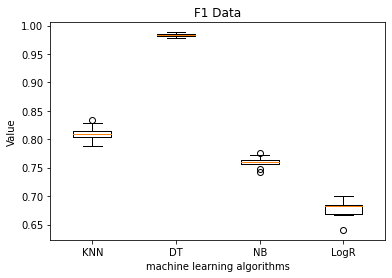

In [82]:
data = [KNN_F1, DT_F1, NB_F1,log_F1]

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a boxplot
ax.boxplot(data, labels=["KNN", "DT", "NB",'LogR'])

# Adding a title and labels for the x and y axis
ax.set_title("F1 Data")
ax.set_xlabel("machine learning algorithms")
ax.set_ylabel("Value")

# Show the plot
plt.show()

In [83]:

import matplotlib.pyplot as plt

# Define the metrics and their values for each algorithm
evaluation = ["accuracy","recall", "precision",  "f1-score"]
KNN = [sum_acc1/10, sum_rec1/10, sum_pre1/10, sum_f1_1/10]
DT = [sum_acc2/10, sum_rec2/10, sum_pre2/10, sum_f1_2/10]
NB = [sum_acc3/10, sum_rec3/10, sum_pre3/10, sum_f1_3/10]
log=[sum_acc4/10, sum_rec4/10, sum_pre4/10, sum_f1_4/10]
angles=np.linspace(0,2*np.pi,len(evaluation), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

evaluation.append(evaluation[0])
KNN.append(KNN[0])
DT.append(DT[0])
NB.append(NB[0])
log.append(log[0])


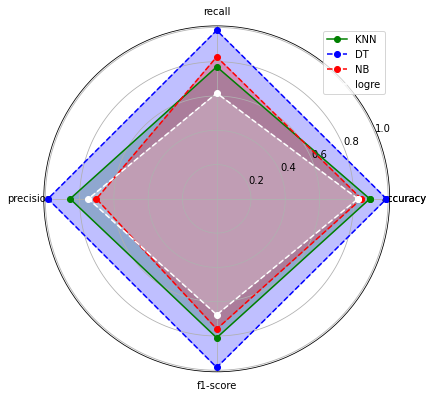

In [84]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

#KNN
ax.plot(angles,KNN, 'o-', color='g', label='KNN')
ax.fill(angles, KNN, alpha=0.25, color='green')

#DT
ax.plot(angles,DT, 'o--', color='b', label='DT')
ax.fill(angles, DT, alpha=0.25, color='blue')

#NB
ax.plot(angles,NB, 'o--', color='r', label='NB')
ax.fill(angles, NB, alpha=0.25, color='red')

#logistic regression
ax.plot(angles,log, 'o--', color='w', label='logre')
ax.fill(angles, log, alpha=0.25, color='white')

ax.set_thetagrids(angles * 180/np.pi, evaluation)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()